In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import os
from glob import glob
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]

In [140]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    print(column_name)
    x = np.arange(0, len(data_frame)/100, step=1/100)
    # y = np.arange(0, len(data_frame)/100, step=1/100)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label],color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    plt.imshow(data_frame)
    plt.rcParams['figure.figsize'] = [6, 600]
    #ax.set_title(t)
    #plt.tight_layout()

['1.04058e-16', '1.04058e-16.1']


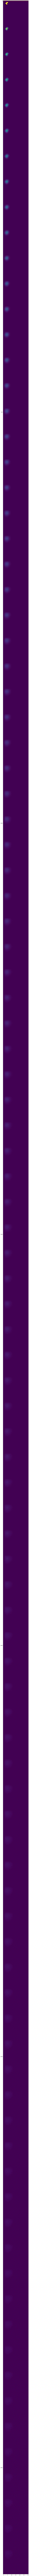

In [141]:
twod_piezo = pd.DataFrame(pd.read_csv("../data_files/2d_Piezo_Channel.csv"))
#display(static_ap_df)
graph_df(twod_piezo,0,2)